<img src="COVER_PAGE.png" alt="Alt text" width="700"/>

In [131]:
import pandas as pd
import numpy as np

In [182]:
# Leemos dataset
data = pd.read_csv("advertising.csv")


In [183]:
# Explorar el dataset
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [184]:
# para la regresión lineal 
import statsmodels.formula.api as smf

In [185]:
# Relacionamos la variable independiente TV con la variable dependiente Sales
# Crear ese modelo lineal
lm = smf.ols(formula="Sales~TV", data = data).fit()

In [186]:
# Propiedades o parámetros del modelo lineal
lm.params

# Nota el valor de predicción sería Sales = 7.032594 + 0.047537 * TV 

Intercept    7.032594
TV           0.047537
dtype: float64

La ecuación del modelo lineal es:
y = b +mx
Sales = 7.032594 + 0.047537 * TV 

In [187]:
# Determinar el valor del coeficiente de predictibilidad
lm.pvalues

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

In [188]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Tue, 23 Apr 2024   Prob (F-statistic):           1.47e-42
Time:                        09:10:46   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [189]:
# Predicción de las ventas con respecto al modelo obtenido
sales_pred = lm.predict(pd.DataFrame(data["TV"]))
sales_pred

0      17.970775
1       9.147974
2       7.850224
3      14.234395
4      15.627218
         ...    
195     8.848493
196    11.510545
197    15.446579
198    20.513985
199    18.065848
Length: 200, dtype: float64

In [190]:
#Graficar la regresión lineal
import matplotlib.pyplot as plt

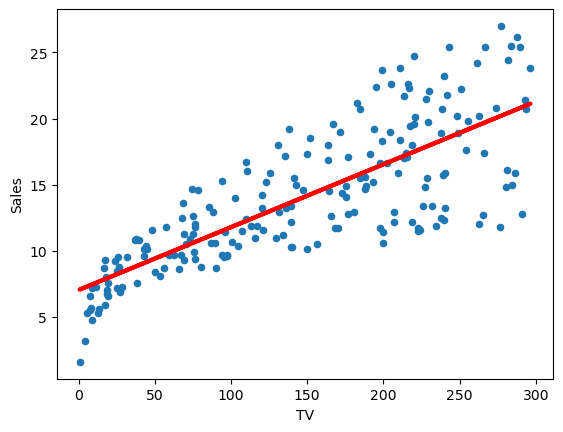

In [191]:
%matplotlib inline
data.plot(kind = "scatter", x = "TV", y="Sales")
plt.plot(pd.DataFrame(data["TV"]), sales_pred, c = "red", linewidth= 3)

Comentarios:
Esta es la gráfica del modelo de regresión lineal obtenido. Los puntos azules son los valores contenidos en el dataset y representan los datos de entrada del modelo. Los puntos rojos son los puntos de la regresión lineal. Si tomamos un punto azul y uno rojo vamos encontrar una diferencia llamada el error de predicción. Error residual. 

In [192]:
# Calculamos el error residual
# Agregar al dataset data una columna llamada las predicciones de las ventas, calculadas con el modelo 
# lineal
data["sales_pred"] = 7.032594 + 0.047537 * data["TV"] 
data.head()

,TV,Radio,Newspaper,Sales,sales_pred
0,230.1,37.8,69.2,22.1,17.970858
1,44.5,39.3,45.1,10.4,9.147990
2,17.2,45.9,69.3,9.3,7.850230
3,151.5,41.3,58.5,18.5,14.234450
4,180.8,10.8,58.4,12.9,15.627284


In [193]:
# Calculamos y agregamos como columna el (RSE) Error Residual Estandar
data["RSE"] = (data["Sales"] - data["sales_pred"])**2
data.head()

,TV,Radio,Newspaper,Sales,sales_pred,RSE
0,230.1,37.8,69.2,22.1,17.970858,17.049816
1,44.5,39.3,45.1,10.4,9.147990,1.567528
2,17.2,45.9,69.3,9.3,7.850230,2.101832
3,151.5,41.3,58.5,18.5,14.234450,18.194921
4,180.8,10.8,58.4,12.9,15.627284,7.438076


In [194]:
# El algoritmo de Regresión se basa en la suma de los cuadrados de los errores o de las diferencias(SSD)
SSD = sum(data["RSE"])
SSD


2102.5305838896525

In [195]:
# Desviación estándar de los errores residuales (RSE) Error Residual Estándar
RSE = np.sqrt(SSD/(len(data)-2))
RSE

3.258656369238098

In [196]:
# Obtenemos la media de las ventas
sales_m = np.mean(data["Sales"])
sales_m

14.0225

In [197]:
# Obtenemos la media del error
error_p = RSE/sales_m
error_p

0.23238768901680143

(array([ 4., 10., 13., 17., 40., 42., 33., 16., 17.,  8.]),
 array([-8.3860819 , -6.82624404, -5.26640618, -3.70656832, -2.14673046,
        -0.5868926 ,  0.97294526,  2.53278312,  4.09262098,  5.65245884,
         7.2122967 ]),
 <BarContainer object of 10 artists>)

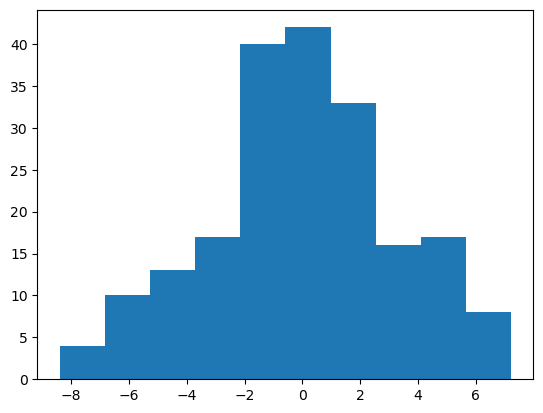

In [198]:
# Histograma podemos ver la media de los errores, pero también podemos comprobar si el error o sesgo 
# tiene una distribución normal
plt.hist((data["Sales"]-data["sales_pred"]))

## Regresion Lineal Multiple
El modelo anterior presenta un sesgo del 23% en predicciones es un poco alto, debemos considerar otras variables predictoras para generar un modelo de regresion multiple
El problema es identificar las variables predictoras
Identificar cuales variables tienen mayor correlacion con la variable dependiente

In [199]:
# Si analizamos el dataset
data.head()

,TV,Radio,Newspaper,Sales,sales_pred,RSE
0,230.1,37.8,69.2,22.1,17.970858,17.049816
1,44.5,39.3,45.1,10.4,9.147990,1.567528
2,17.2,45.9,69.3,9.3,7.850230,2.101832
3,151.5,41.3,58.5,18.5,14.234450,18.194921
4,180.8,10.8,58.4,12.9,15.627284,7.438076


Lista de Variables Predictoras 
* Sales ~ TV
* Sales ~ Radio
* Sales ~ Newspaper
* Sales ~ TV + Newspaper
* Sales ~ TV + Radio
* Sales ~ Radio + Newspaper
* Sales ~ TV + Radio + Newspaper


In [200]:
# Creamos modelo de regresión múltiple
lm2 = smf.ols(formula = "Sales~TV+Newspaper", data = data).fit()
# Parámetros del modelo lineal: coeficientes de la ecuación
lm2.params

Intercept    5.774948
TV           0.046901
Newspaper    0.044219
dtype: float64

Ecuación del modelo:
Sales = 5.774948 + 0.046901*TV + 0.044219*Newspaper

In [201]:
lm2.pvalues

Intercept    3.145860e-22
TV           5.507584e-44
Newspaper    2.217084e-05
dtype: float64

In [202]:
# Valores R2
lm2.rsquared

0.6458354938293271

In [203]:
# Valores R2 con ajuste
lm2.rsquared_adj

0.6422399150864777

In [204]:
# Creamos la predicción de las ventas con respecto a las dos variables predictoras
sales_pred = lm2.predict(data[["TV", "Newspaper"]])
sales_pred

0      19.626901
1       9.856348
2       9.646055
3      15.467318
4      16.837102
         ...    
195     8.176802
196    10.551220
197    14.359467
198    22.003458
199    17.045429
Length: 200, dtype: float64

In [205]:
# Desviación estándar de los residuos
SSD = sum((data["Sales"] - sales_pred)**2)
SSD

1918.561811896827

In [206]:
# RSE
RSE = np.sqrt(SSD/(len(data)-3))
RSE

3.120719860252885

In [207]:
# Error de predicción o sesgo
error = RSE / sales_m
error

0.2225508903728212

In [208]:
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     179.6
Date:                Tue, 23 Apr 2024   Prob (F-statistic):           3.95e-45
Time:                        09:11:46   Log-Likelihood:                -509.89
No. Observations:                 200   AIC:                             1026.
Df Residuals:                     197   BIC:                             1036.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.7749      0.525     10.993      0.000       4.739       6.811
TV             0.0469      0.003     18.173      0.000       0.042       0.052
Newspaper      0.0442      0.010      4.346      0.000       0.024       0.064
==============================================================================
Omnibus:                        0.658   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.720   Jarque-Bera (JB):                0.415
Skew:                          -0.093   Prob(JB):                        0.813
Kurtosis:                       3.122   Cond. No.                         410.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Elaboramos modelo lineal considerando las variables predictoras TV y Radio

In [230]:
# Creamos modelo de regresión múltiple
lm3 = smf.ols(formula = "Sales~TV+Radio", data = data).fit()
# Parámetros del modelo lineal: coeficientes de la ecuación
lm3.params

Intercept    2.921100
TV           0.045755
Radio        0.187994
dtype: float64

Ecuación del modelo: Sales = 2.921100 + 0.045755TV +0.187994Radio

In [229]:
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Tue, 23 Apr 2024   Prob (F-statistic):           4.83e-98
Time:                        09:13:35   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
Radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [231]:
# Creamos la predicción de las ventas con respecto a las dos variables predictoras
sales_pred = lm3.predict(data[["TV", "Radio"]])
SSD = sum((data["Sales"]-sales_pred)**2)
RSE = np.sqrt(SSD/(len(data)-3))
RSE

1.681360912508001

In [233]:
# Error de predicción
RSE/sales_m

0.1199045043685506

Ahora concluimos que con dos variables predictoras mejoró, entonces con tres será mejor:

In [213]:
# Con tres variables predictoras
# Creamos modelo de regresión múltiple
lm4 = smf.ols(formula = "Sales~TV+Radio+Newspaper", data = data).fit()
# Parámetros del modelo lineal: coeficientes de la ecuación
lm4.params

Intercept    2.938889
TV           0.045765
Radio        0.188530
Newspaper   -0.001037
dtype: float64

In [214]:
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Tue, 23 Apr 2024   Prob (F-statistic):           1.58e-96
Time:                        09:12:11   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [215]:
# Creamos la predicción de las ventas con respecto a las dos variables predictoras
sales_pred = lm4.predict(data[["TV", "Radio", "Newspaper"]])
SSD = sum((data["Sales"]-sales_pred)**2)
RSE = np.sqrt(SSD/(len(data)-3))
RSE

1.6812269856174873

In [216]:
# Error de predicción
RSE/sales_m

0.11989495351167674


Elaborar un modelo lineal para las combinaciones restantes del modelo.

Lista de Variables Predictoras 
* Sales ~ Radio

In [217]:
# Creamos modelo de regresión múltiple
lm5 = smf.ols(formula = "Sales~Radio", data = data).fit()
# Parámetros del modelo lineal: coeficientes de la ecuación
lm5.params

Intercept    9.311638
Radio        0.202496
dtype: float64

In [218]:
lm5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     98.42
Date:                Tue, 23 Apr 2024   Prob (F-statistic):           4.35e-19
Time:                        09:12:27   Log-Likelihood:                -573.34
No. Observations:                 200   AIC:                             1151.
Df Residuals:                     198   BIC:                             1157.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.3116      0.563     16.542      0.000       8.202      10.422
Radio          0.2025      0.020      9.921      0.000       0.162       0.243
==============================================================================
Omnibus:                       19.358   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.910
Skew:                          -0.764   Prob(JB):                     1.75e-05
Kurtosis:                       3.544   Cond. No.                         51.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [219]:
# Creamos la predicción de las ventas con respecto a las dos variables predictoras
sales_pred = lm5.predict(data[["Radio"]])
SSD = sum((data["Sales"]-sales_pred)**2)
RSE = np.sqrt(SSD/(len(data)-3))
RSE

4.285780733135228

In [220]:
# Error de predicción
RSE/sales_m

0.30563599451846873


Elaborar un modelo lineal para las combinaciones restantes del modelo.

Lista de Variables Predictoras 

* Sales ~ Newspaper


In [221]:
# Creamos modelo de regresión múltiple
lm6 = smf.ols(formula = "Sales~Newspaper", data = data).fit()
# Parámetros del modelo lineal: coeficientes de la ecuación
lm6.params

Intercept    12.351407
Newspaper     0.054693
dtype: float64

In [222]:
lm6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     10.89
Date:                Tue, 23 Apr 2024   Prob (F-statistic):            0.00115
Time:                        09:12:39   Log-Likelihood:                -608.34
No. Observations:                 200   AIC:                             1221.
Df Residuals:                     198   BIC:                             1227.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.3514      0.621     19.876      0.000      11.126      13.577
Newspaper      0.0547      0.017      3.300      0.001       0.022       0.087
==============================================================================
Omnibus:                        6.231   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.044   Jarque-Bera (JB):                5.483
Skew:                           0.330   Prob(JB):                       0.0645
Kurtosis:                       2.527   Cond. No.                         64.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [223]:
# Creamos la predicción de las ventas con respecto a las dos variables predictoras
sales_pred = lm6.predict(data[["Newspaper"]])
SSD = sum((data["Sales"]-sales_pred)**2)
RSE = np.sqrt(SSD/(len(data)-3))
RSE

5.10538908270931

In [224]:
# Error de predicción
RSE/sales_m

0.3640855113360178

Lista de Variables Predictoras:

* Sales ~ Radio + Newspaper

In [225]:
# Creamos modelo de regresión múltiple
lm7 = smf.ols(formula = "Sales~Radio+Newspaper", data = data).fit()
# Parámetros del modelo lineal: coeficientes de la ecuación
lm7.params

Intercept    9.188920
Radio        0.199045
Newspaper    0.006644
dtype: float64

In [226]:
lm7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.326
Method:                 Least Squares   F-statistic:                     49.11
Date:                Tue, 23 Apr 2024   Prob (F-statistic):           4.96e-18
Time:                        09:12:52   Log-Likelihood:                -573.24
No. Observations:                 200   AIC:                             1152.
Df Residuals:                     197   BIC:                             1162.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.1889      0.628     14.640      0.000       7.951      10.427
Radio          0.1990      0.022      9.101      0.000       0.156       0.242
Newspaper      0.0066      0.015      0.446      0.656      -0.023       0.036
==============================================================================
Omnibus:                       19.261   Durbin-Watson:                   1.943
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.768
Skew:                          -0.765   Prob(JB):                     1.88e-05
Kurtosis:                       3.519   Cond. No.                         92.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [227]:
# Creamos la predicción de las ventas con respecto a las dos variables predictoras
sales_pred = lm7.predict(data[["Radio", "Newspaper"]])
SSD = sum((data["Sales"]-sales_pred)**2)
RSE = np.sqrt(SSD/(len(data)-3))
RSE

4.283622025587271

In [228]:
# Error de predicción
RSE/sales_m

0.3054820485353732

Regresión lineal con la libreria scikit/learn

In [234]:
# Importing necessary libraries
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [236]:

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data[["TV", "Radio", "Newspaper"]], data["Sales"], test_size=0.2, random_state=42)

# Creating and fitting the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)
y_pred

Mean Squared Error: 3.1740973539761046
R^2 Score: 0.899438024100912


array([16.4080242 , 20.88988209, 21.55384318, 10.60850256, 22.11237326,
       13.10559172, 21.05719192,  7.46101034, 13.60634581, 15.15506967,
        9.04831992,  6.65328312, 14.34554487,  8.90349333,  9.68959028,
       12.16494386,  8.73628397, 16.26507258, 10.27759582, 18.83109103,
       19.56036653, 13.25103464, 12.33620695, 21.30695132,  7.82740305,
        5.80957448, 20.75753231, 11.98138077,  9.18349576,  8.5066991 ,
       12.46646769, 10.00337695, 21.3876709 , 12.24966368, 18.26661538,
       20.13766267, 14.05514005, 20.85411186, 11.0174441 ,  4.56899622])

Conclusions

One of the Machine learning models used to predict dependent variables are Multiple Linear Regression models, in this case we observed that when we change the number of input values we can improve the behavior of the model, by doing different combinations to fit the model I noticed the differences in error results for each prediction and how the R-squared was changing when I applied different input parameters. I also compared the results with two different libraries called "statsmodels" and "sklearn.linear_model". In my opinion "sklearn.linear_model" is more user friendly, but "statsmodels" provides useful information about statistics, for example coefficients, standard errors, t-values, p-values an d more. These values are relevant to get insights from the parameters and general behavior of the model.  
